In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-data-los-angeles/Los_Angeles_Crime.csv


In [3]:
# importing the libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from pathlib import Path
import datetime

In [4]:
df= pd.read_csv('/kaggle/input/crime-data-los-angeles/Los_Angeles_Crime.csv')
df.head()

,RECORD_NUMBER,DATE_REPORTED,DATE_OCCURRENCE,TIME_OF_OCCURRENCE,AREA,AREA_NAME,RPT_DIST_NO,PART_1_2,CRIME_CODE,CRIME_CD_DESC,...,STATUS,STATUS_DESC,CRIME_CODE_1,CRIME_CODE_2,CRIME_CODE_3,CRIME_CODE_4,LOCATION,CROSS_STREET,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


# Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407199 entries, 0 to 407198
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   RECORD_NUMBER       407199 non-null  int64  
 1   DATE_REPORTED       407199 non-null  object 
 2   DATE_OCCURRENCE     407199 non-null  object 
 3   TIME_OF_OCCURRENCE  407199 non-null  int64  
 4   AREA                407199 non-null  int64  
 5   AREA_NAME           407199 non-null  object 
 6   RPT_DIST_NO         407199 non-null  int64  
 7   PART_1_2            407199 non-null  int64  
 8   CRIME_CODE          407199 non-null  int64  
 9   CRIME_CD_DESC       407199 non-null  object 
 10  MOCODES             350928 non-null  object 
 11  VICTIM_AGE          407199 non-null  int64  
 12  VICTIM_SEX          353458 non-null  object 
 13  VICTIM_DESCENT      353453 non-null  object 
 14  PREMIS_CD           407194 non-null  float64
 15  PREMIS_DESC         407039 non-nul

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RECORD_NUMBER,407199.0,2.065638e+08,5.383830e+06,817.0000,2.012101e+08,2.101217e+08,2.112125e+08,2.221167e+08
TIME_OF_OCCURRENCE,407199.0,1.349038e+03,6.506296e+02,1.0000,9.150000e+02,1.430000e+03,1.900000e+03,2.359000e+03
AREA,407199.0,1.079806e+01,6.049702e+00,1.0000,6.000000e+00,1.100000e+01,1.600000e+01,2.100000e+01
RPT_DIST_NO,407199.0,1.126036e+03,6.050811e+02,101.0000,6.310000e+02,1.148000e+03,1.621000e+03,2.199000e+03
PART_1_2,407199.0,1.413304e+00,4.924271e-01,1.0000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
CRIME_CODE,407199.0,5.068531e+02,2.098507e+02,110.0000,3.300000e+02,4.800000e+02,6.260000e+02,9.560000e+02
VICTIM_AGE,407199.0,3.005612e+01,2.171832e+01,-1.0000,1.200000e+01,3.100000e+01,4.500000e+01,1.200000e+02
PREMIS_CD,407194.0,2.978673e+02,2.145680e+02,101.0000,1.010000e+02,2.030000e+02,5.010000e+02,9.710000e+02
WEAPON_USED_CODE,146379.0,3.620555e+02,1.233759e+02,101.0000,3.080000e+02,4.000000e+02,4.000000e+02,5.160000e+02
CRIME_CODE_1,407195.0,5.065797e+02,2.096428e+02,110.0000,3.300000e+02,4.800000e+02,6.260000e+02,9.560000e+02


In [7]:
# finding null values
df.isnull().sum()

RECORD_NUMBER              0
DATE_REPORTED              0
DATE_OCCURRENCE            0
TIME_OF_OCCURRENCE         0
AREA                       0
AREA_NAME                  0
RPT_DIST_NO                0
PART_1_2                   0
CRIME_CODE                 0
CRIME_CD_DESC              0
MOCODES                56271
VICTIM_AGE                 0
VICTIM_SEX             53741
VICTIM_DESCENT         53746
PREMIS_CD                  5
PREMIS_DESC              160
WEAPON_USED_CODE      260820
WEAPON_DESC           260820
STATUS                     0
STATUS_DESC                0
CRIME_CODE_1               4
CRIME_CODE_2          374842
CRIME_CODE_3          406090
CRIME_CODE_4          407164
LOCATION                   0
CROSS_STREET          336150
LAT                        0
LON                        0
dtype: int64

In [8]:
df.columns

Index(['RECORD_NUMBER', 'DATE_REPORTED', 'DATE_OCCURRENCE',
       'TIME_OF_OCCURRENCE', 'AREA', 'AREA_NAME', 'RPT_DIST_NO', 'PART_1_2',
       'CRIME_CODE', 'CRIME_CD_DESC', 'MOCODES', 'VICTIM_AGE', 'VICTIM_SEX',
       'VICTIM_DESCENT', 'PREMIS_CD', 'PREMIS_DESC', 'WEAPON_USED_CODE',
       'WEAPON_DESC', 'STATUS', 'STATUS_DESC', 'CRIME_CODE_1', 'CRIME_CODE_2',
       'CRIME_CODE_3', 'CRIME_CODE_4', 'LOCATION', 'CROSS_STREET', 'LAT',
       'LON'],
      dtype='object')

In [9]:
df.shape
df.dtypes

RECORD_NUMBER           int64
DATE_REPORTED          object
DATE_OCCURRENCE        object
TIME_OF_OCCURRENCE      int64
AREA                    int64
AREA_NAME              object
RPT_DIST_NO             int64
PART_1_2                int64
CRIME_CODE              int64
CRIME_CD_DESC          object
MOCODES                object
VICTIM_AGE              int64
VICTIM_SEX             object
VICTIM_DESCENT         object
PREMIS_CD             float64
PREMIS_DESC            object
WEAPON_USED_CODE      float64
WEAPON_DESC            object
STATUS                 object
STATUS_DESC            object
CRIME_CODE_1          float64
CRIME_CODE_2          float64
CRIME_CODE_3          float64
CRIME_CODE_4          float64
LOCATION               object
CROSS_STREET           object
LAT                   float64
LON                   float64
dtype: object

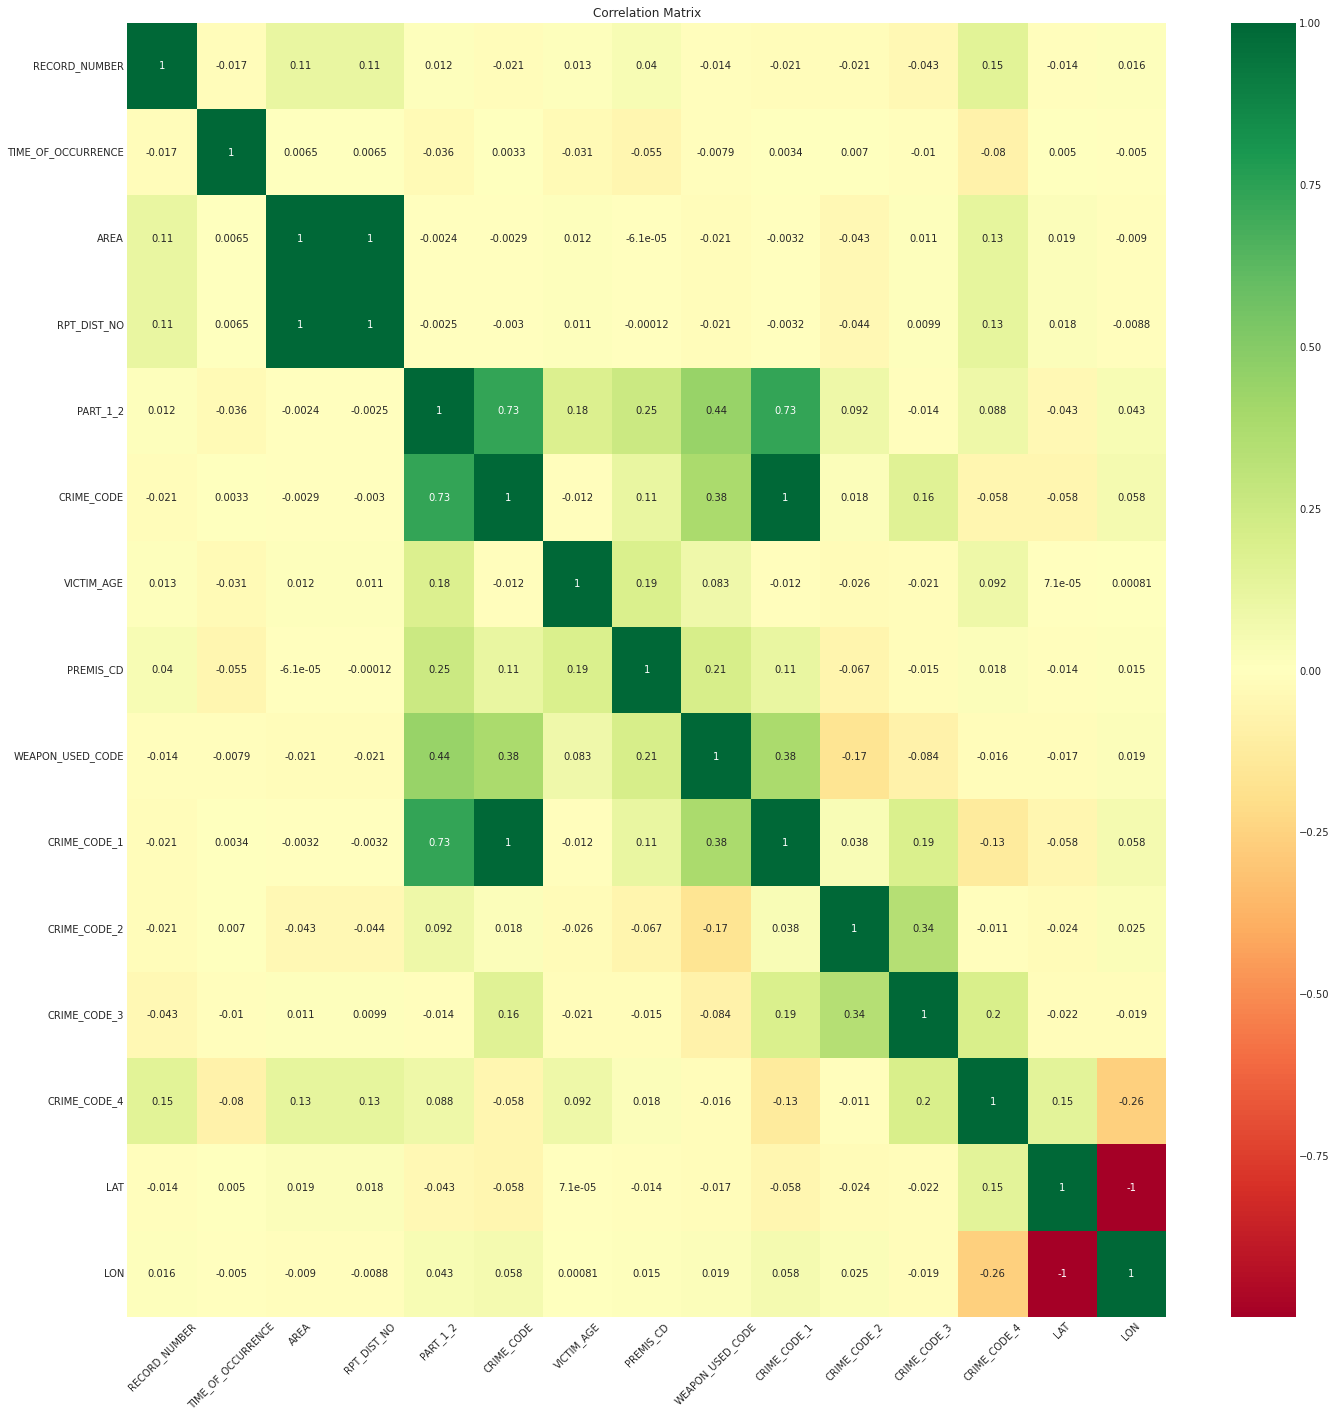

In [17]:
# plotting the heatmap
plt.figure(figsize=(20,20))
plt.style.use('seaborn-whitegrid')
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.fontsize=20
plt.title('Correlation Matrix')
plt.show()

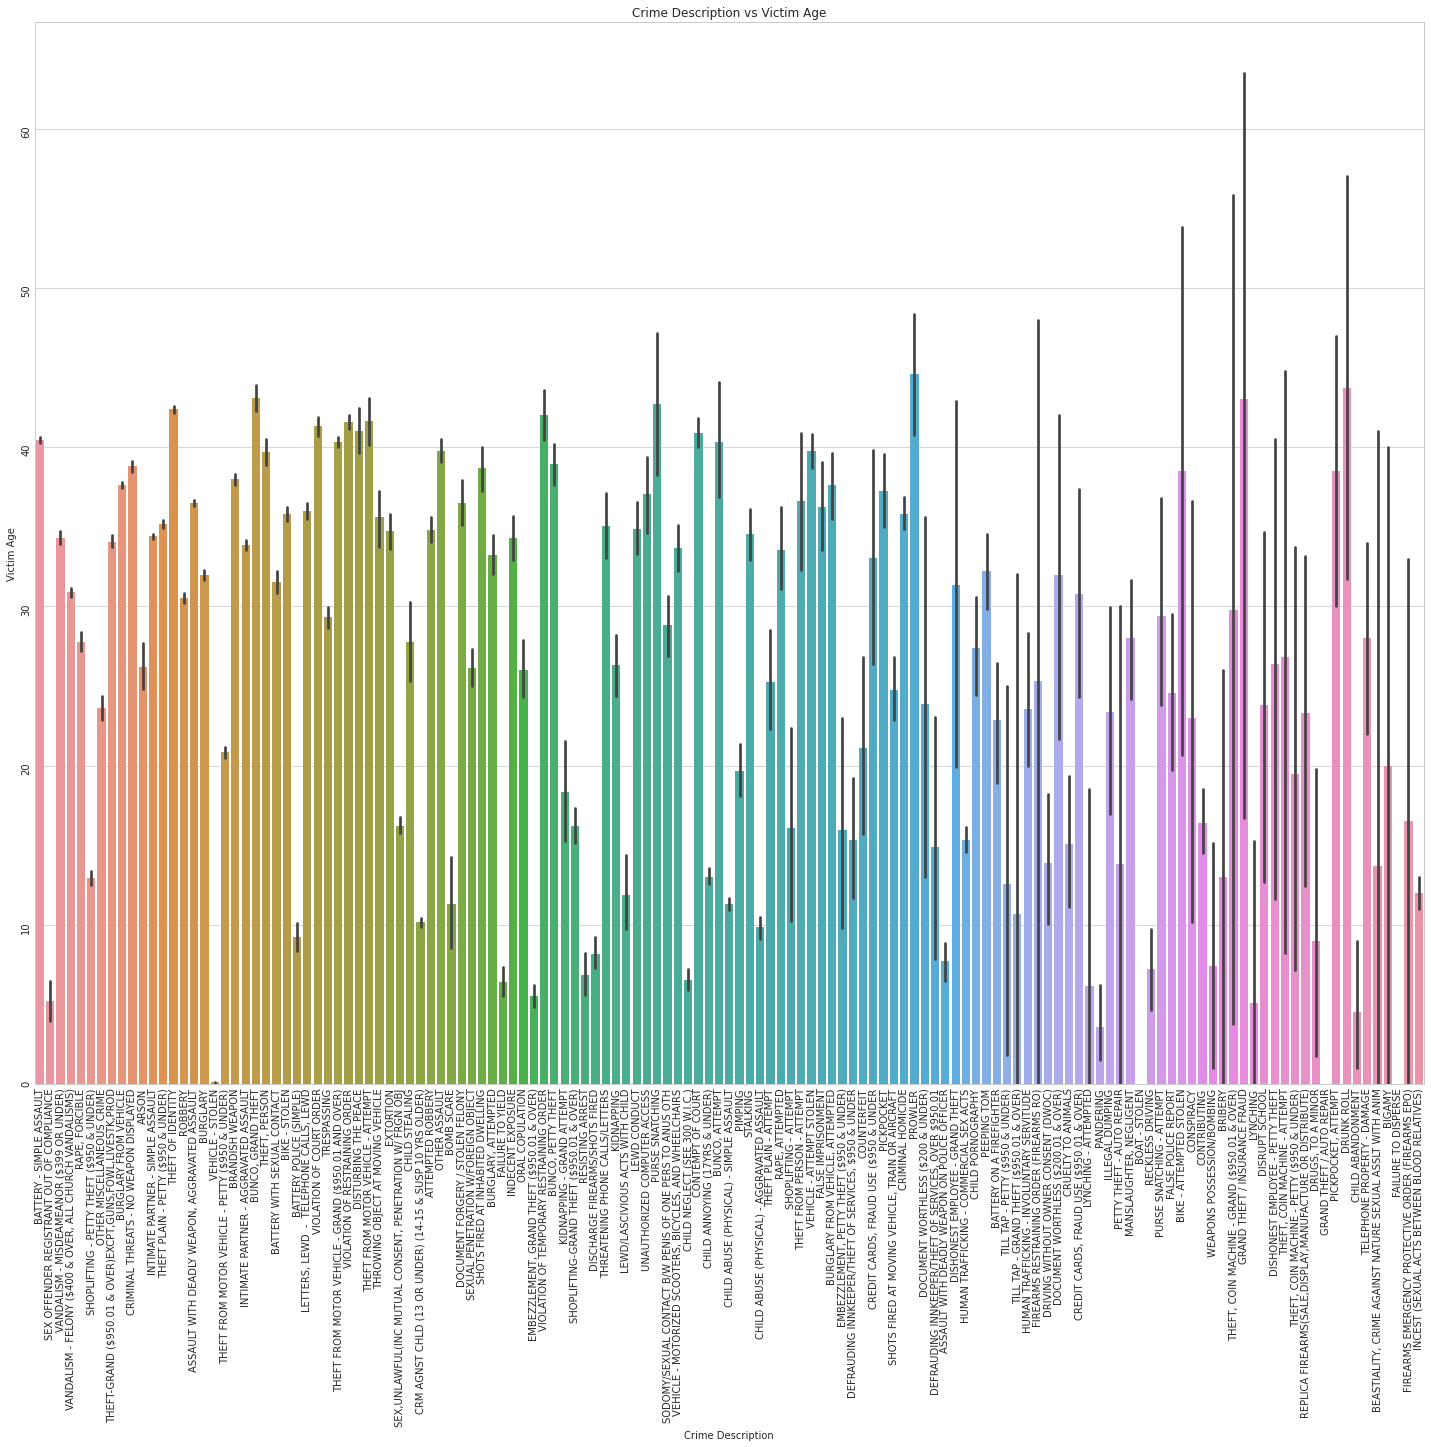

In [20]:
plt.figure(figsize=(20,20))
sns.barplot(x='CRIME_CD_DESC', y='VICTIM_AGE', data=df)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.tight_layout()
plt.xlabel('Crime Description')
plt.ylabel('Victim Age')
plt.title('Crime Description vs Victim Age')
plt.show()

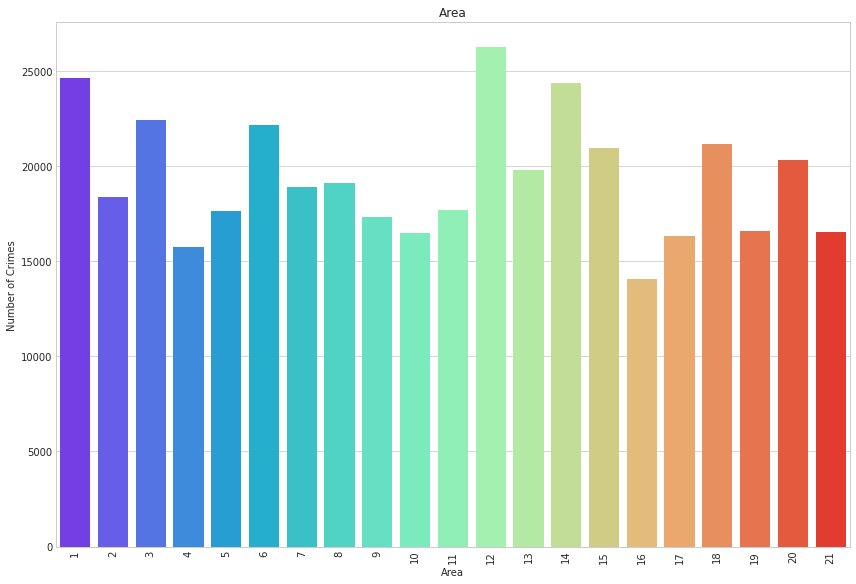

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x='AREA',data=df, palette='rainbow')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()    
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Area')
plt.title('Area')
plt.show()


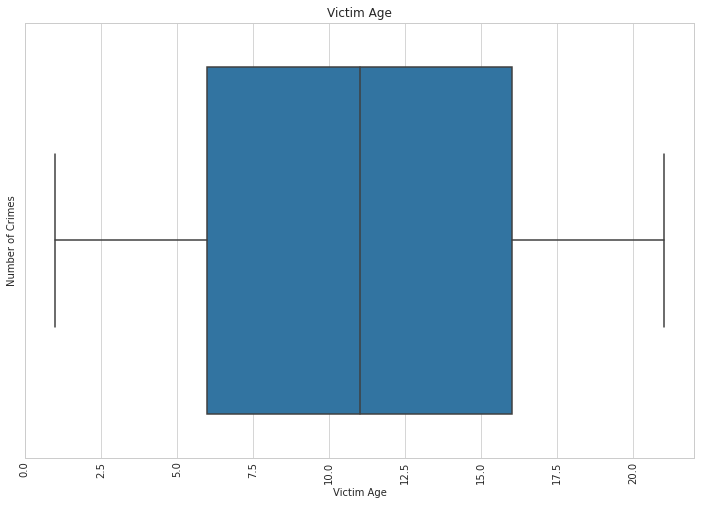

In [34]:
plt.figure(figsize=(12,8))
# find anomalies
sns.boxplot(x='AREA',data=df)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
# annotations true
plt.annotate('Anomaly', xy=(0, 100), xytext=(0, 100),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.xlabel('Victim Age')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Victim Age')
plt.title('Victim Age')
plt.show()

In [ ]:
df = pd.read_csv('/kaggle/input/crime-data-los-angeles/Los_Angeles_Crime.csv').head(10000)
df['DATE_OCCURRENCE'] = pd.to_datetime(df['DATE_OCCURRENCE'])
df['DATE_REPORTED'] = pd.to_datetime(df['DATE_REPORTED'])
df['OCCURRENCE_YEAR'] = df['DATE_OCCURRENCE'].dt.year
df['OCCURRENCE_MONTH'] = df['DATE_OCCURRENCE'].dt.month
df['REPORTED_YEAR'] = df['DATE_REPORTED'].dt.year
df['REPORTED_MONTH'] = df['DATE_REPORTED'].dt.month
df['DELAY_IN_REPORTING'] = df['DATE_REPORTED'] - df['DATE_OCCURRENCE']

In [ ]:
null_count_df = pd.DataFrame((df.isnull().sum()).sort_values(ascending=False).reset_index())
null_count_df.style.background_gradient(cmap='YlOrRd')

In [45]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from wordcloud import WordCloud, STOPWORDS 

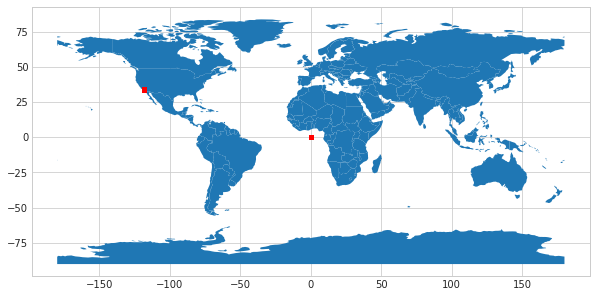

In [46]:
def plot_map(df):
    geometry = [Point(xy) for xy in zip(df['LON'], df['LAT'])]
    gdf = GeoDataFrame(df, geometry=geometry)  
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

plot_map(df)

In [48]:
import plotly.express as px

In [49]:
def no_crime_by_area(df):
    no_crime_by_area = pd.DataFrame(df.groupby('AREA_NAME')['RECORD_NUMBER'].count()).reset_index().sort_values(by ='RECORD_NUMBER',ascending=False).head(10)
    fig = px.pie(no_crime_by_area, values='RECORD_NUMBER', names='AREA_NAME', title='Number Of Crimes By Area')
    fig.show()

no_crime_by_area(df)

In [59]:
def no_crime_by_sex(df):
    no_crime_by_sex = pd.DataFrame(df.groupby('VICTIM_SEX')['RECORD_NUMBER'].count()).reset_index()
    fig=px.pie(no_crime_by_sex, names='VICTIM_SEX', values='RECORD_NUMBER', title='Number Of Crimes By Sex')
    fig.show()
#     return no_crime_by_sex
#     plt.plot(no_crime_by_sex)
#     plt.show()

no_crime_by_sex(df)

In [64]:
def crime_sunburst(df):
    crime_sunburst = df.groupby(['CRIME_CD_DESC', 'VICTIM_DESCENT'])['RECORD_NUMBER'].count().reset_index()
    crime_sunburst.columns = ['CRIME_CD_DESC', 'VICTIM DESCENT', 'COUNT']
    fig = px.sunburst(crime_sunburst, path=['CRIME_CD_DESC', 'VICTIM DESCENT'], values='COUNT', title='Crime Sunburst')
    plt.figure(figsize=(12,8))
    fig.show()

crime_sunburst(df)

<Figure size 864x576 with 0 Axes>

In [65]:
def most_common_wepons(df):
    most_common_wepons = df.groupby('WEAPON_DESC')['RECORD_NUMBER'].count().reset_index().sort_values(by ='RECORD_NUMBER',ascending=False).head(10)
    fig = px.bar(most_common_wepons, x='WEAPON_DESC', y='RECORD_NUMBER', title='Most Common Weapons')
    fig.show()

most_common_wepons(df)

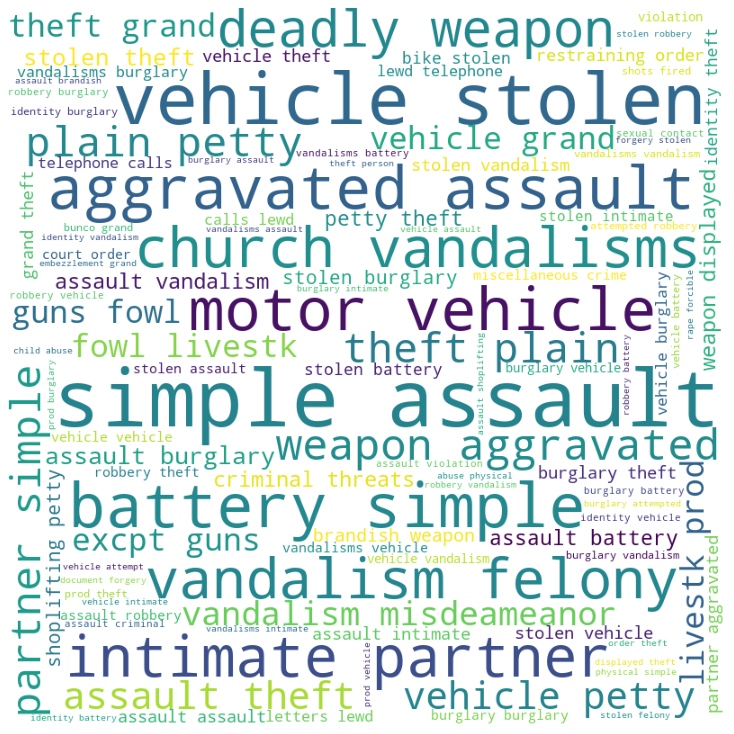

In [70]:
def wordcloud(df):
    comment_words = ''   
    stopwords = set(STOPWORDS) 
    for val in df.CRIME_CD_DESC: 
        val = str(val) 
        tokens = val.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                stopwords=stopwords,
                min_font_size = 10).generate(comment_words) 


    # plot the WordCloud image                        
    plt.figure(figsize = (20, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.tight_layout()
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

wordcloud(df)

In [79]:
# import the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier